In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])


In [4]:
a=app_train.corr()['TARGET']>0

In [20]:
a.sort_values()

SK_ID_CURR                                           False
NAME_FAMILY_STATUS_Married                           False
NAME_FAMILY_STATUS_Unknown                           False
NAME_FAMILY_STATUS_Widow                             False
NAME_HOUSING_TYPE_Co-op apartment                    False
NAME_HOUSING_TYPE_House / apartment                  False
NAME_HOUSING_TYPE_Office apartment                   False
OCCUPATION_TYPE_Accountants                          False
OCCUPATION_TYPE_Core staff                           False
NAME_EDUCATION_TYPE_Higher education                 False
OCCUPATION_TYPE_HR staff                             False
OCCUPATION_TYPE_IT staff                             False
OCCUPATION_TYPE_Managers                             False
OCCUPATION_TYPE_Medicine staff                       False
OCCUPATION_TYPE_Private service staff                False
OCCUPATION_TYPE_Realty agents                        False
OCCUPATION_TYPE_Secretaries                          Fal

In [21]:
corr_m = app_train.corr()['TARGET']

In [25]:
sorted_corr = corr_m.sort_values()
print(sorted_corr.head(15))#前15
print(sorted_corr.tail(15))#後15

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
Name: TARGET, dtype: float64
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                            

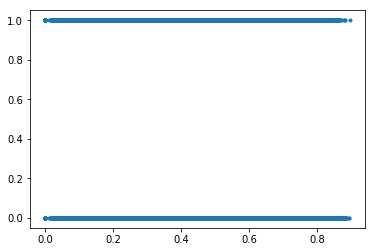

In [30]:
plt.plot(app_train['EXT_SOURCE_3'] , app_train['TARGET'], '.')

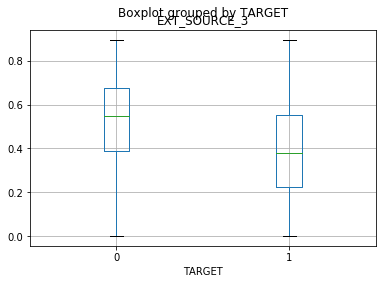

In [34]:
app_train.boxplot('EXT_SOURCE_3',by='TARGET')